# Applying Bipartite Networks in Research.

*   A bipartite network is useful whenever we have repeated observations linking two distinct types of entities. In such cases, we can operationalize the relationship as a two-mode network.  

Examples include:

* Person – Listens to – Music track
* Person – Watches – Movie
* Person – Belongs to – Club
* Person – Talks about – A certain belief/topic/phrase...

In this script, we focus on the last example, people and the things they say. This structure can be extended to common NLP tasks such as topic modeling, linking people to what they have said.

### Simple example

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Example data: person says word
data = [
    ("Alice", "freedom"),
    ("Alice", "justice"),
    ("Bob", "freedom"),
    ("Bob", "music"),
    ("Carol", "justice"),
    ("Carol", "art"),
]

# Create bipartite graph
B = nx.Graph()
people = {p for p, w in data}
words = {w for p, w in data}

B.add_nodes_from(people, bipartite=0)  # set A
B.add_nodes_from(words, bipartite=1)   # set B
B.add_edges_from(data)

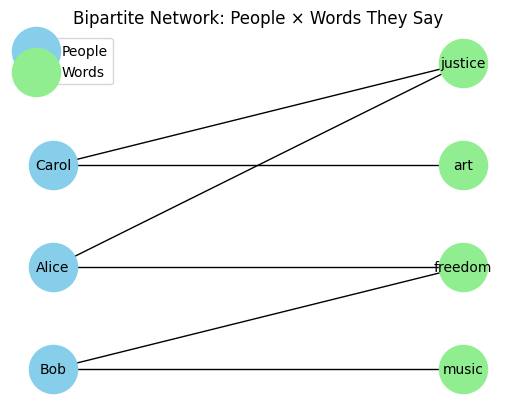

In [ ]:
# Position nodes: left for people, right for words
pos = {}
pos.update((p, (0, i)) for i, p in enumerate(people))  # x=0 for people
pos.update((w, (1, i)) for i, w in enumerate(words))   # x=1 for words

# Draw nodes
nx.draw_networkx_nodes(B, pos, nodelist=people, node_color="skyblue", node_size=1200, label="People")
nx.draw_networkx_nodes(B, pos, nodelist=words, node_color="lightgreen", node_size=1200, label="Words")

# Draw edges
nx.draw_networkx_edges(B, pos, width=1)

# Draw labels
nx.draw_networkx_labels(B, pos, font_size=10, font_family="sans-serif")

plt.title("Bipartite Network: People × Words They Say")
plt.axis("off")
plt.legend()
plt.show()


In [ ]:

# Project to people–people similarity network
P = nx.bipartite.weighted_projected_graph(B, people)

# Project to word–word similarity network
W = nx.bipartite.weighted_projected_graph(B, words)

print("People–People Projection:")
for u, v, d in P.edges(data=True):
    print(u, v, "shared words:", d['weight'])

print("\nWord–Word Projection:")
for u, v, d in W.edges(data=True):
    print(u, v, "shared speakers:", d['weight'])


People–People Projection:
Bob Alice shared words: 1
Alice Carol shared words: 1

Word–Word Projection:
music freedom shared speakers: 1
freedom justice shared speakers: 1
art justice shared speakers: 1


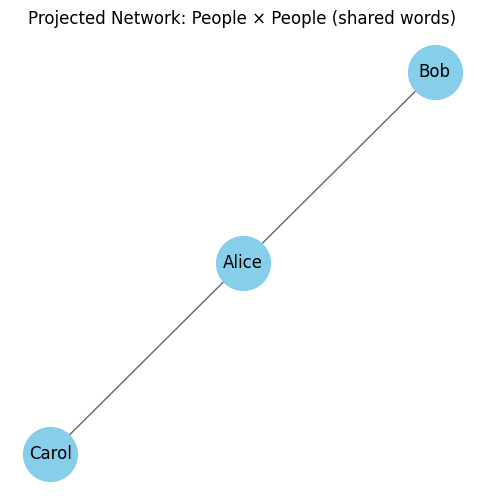

In [ ]:
# --- Step 4: Visualize People–People Projection ---
plt.figure(figsize=(6,6))
pos_proj = nx.spring_layout(P, seed=42)  # spring layout for clarity
edges = nx.draw_networkx_edges(P, pos_proj, width=[d['weight'] for _,_,d in P.edges(data=True)], alpha=0.6)
nodes = nx.draw_networkx_nodes(P, pos_proj, node_color="skyblue", node_size=1500)
labels = nx.draw_networkx_labels(P, pos_proj, font_size=12, font_family="sans-serif")

plt.title("Projected Network: People × People (shared words)")
plt.axis("off")
plt.show()

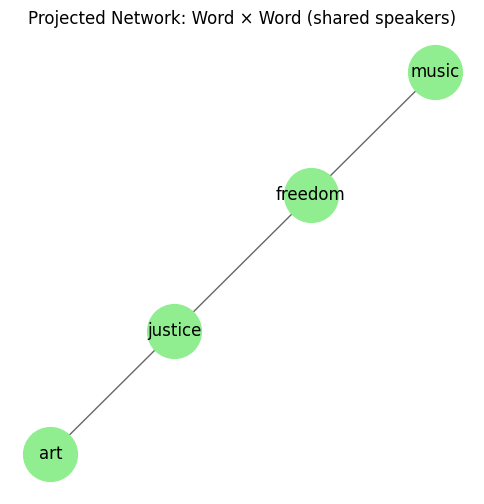


Word–Word Projection Edges:
music – freedom, shared speakers = 1
freedom – justice, shared speakers = 1
art – justice, shared speakers = 1


In [ ]:
# --- Step 6: Visualize Word–Word Projection ---
plt.figure(figsize=(6,6))
pos_word = nx.spring_layout(W, seed=24)
nx.draw_networkx_edges(W, pos_word, width=[d['weight'] for _,_,d in W.edges(data=True)], alpha=0.6)
nx.draw_networkx_nodes(W, pos_word, node_color="lightgreen", node_size=1500)
nx.draw_networkx_labels(W, pos_word, font_size=12, font_family="sans-serif")

plt.title("Projected Network: Word × Word (shared speakers)")
plt.axis("off")
plt.show()

print("\nWord–Word Projection Edges:")
for u, v, d in W.edges(data=True):
    print(f"{u} – {v}, shared speakers = {d['weight']}")


### Research example: Choi & Youn (2022). The media policy debate over punitive damages for media reports : A discourse network analysis

* Regarding a particular media policy, "who says what with whom?"
* Paper: https://waf-e.dubuplus.com/comm.dubuplus.com/anonymous/O18Bp4M/DubuDisk/letter/KJJCS/66-2/01.pdf (in Korean)
* If you are interested in 'Discourse Network Analysis' proposed by P. Leifeld, take a look at https://eprints.gla.ac.uk/121525/1/121525.pdf and other works by him.
* I extracted 'who said what' about a particular media policy from news articles, and manually classified which policy beliefs they showed.
* Examples: [Supporting](https://drive.google.com/file/d/1dI8iKaxz5iW5TnPOQoV_YwLIOaaQQqlr/view?usp=sharing) and [Opposing](https://drive.google.com/file/d/1UdR8XDirPAVD39Qr9y8_MYymhtGZWZWv/view?usp=sharing) policy
* Policy Beliefs: https://docs.google.com/document/d/1vs2MNWFleaP386ettHtpkmk5IxcUdJaN/edit?usp=sharing&ouid=101020218877352933901&rtpof=true&sd=true (p.8)

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path

INPUT_CSV = "edgelist_with_names.csv"
BIP_OUT = "bipartite_edges_weighted.csv"
LEFT_PROJ_OUT = "projection_left_left_edges.csv"
RIGHT_PROJ_OUT = "projection_right_right_edges.csv"

In [ ]:
df = pd.read_csv(INPUT_CSV)

# Drop NA and remove white space
df = df.dropna(subset=["source","target"]).copy()
df["source"] = df["source"].astype(str).str.strip()
df["target"] = df["target"].astype(str).str.strip()

FileNotFoundError: [Errno 2] No such file or directory: 'edgelist_with_names.csv'

In [ ]:
# Count multiplicities (source, target) → weight
edge_counts = Counter(zip(df["source"], df["target"]))
bip_df = pd.DataFrame(
    [(s, t, w) for (s, t), w in edge_counts.items()],
    columns=["source", "target", "weight"]
)

display(bip_df)

,source,target,weight
0,개인a,2+,1
1,개인b,9+,1
2,개인b,12+,1
3,개인b,14+,1
4,개인b,15+,1
...,...,...,...
212,한국신문협회,4+,1
213,한국신문협회,6+,1
214,한국신문협회,8+,1
215,한국신문협회,11-,1


In [ ]:
B = nx.Graph()

left_nodes = set(bip_df["source"])
right_nodes = set(bip_df["target"])

# Safety check: do any labels appear on both sides?
collision = left_nodes & right_nodes
print(f"Left nodes: {len(left_nodes)}, Right nodes: {len(right_nodes)}, Collisions: {len(collision)}")

# Add nodes with bipartite attribute
B.add_nodes_from(left_nodes,  bipartite=0)
B.add_nodes_from(right_nodes, bipartite=1)

# Add weighted edges
B.add_weighted_edges_from(bip_df[["source","target","weight"]].itertuples(index=False, name=None))

# Sanity check
print("Is bipartite?", nx.is_bipartite(B))
print(f"Nodes: {B.number_of_nodes()}, Edges: {B.number_of_edges()}")


Left nodes: 74, Right nodes: 31, Collisions: 0
Is bipartite? True
Nodes: 105, Edges: 217


In [ ]:
# Project SOURCE side (policy actors) by shared neighbors on TARGETR
G_left = nx.bipartite.weighted_projected_graph(B, left_nodes)

# Project TARGET side (policy beliefs) by shared neighbors on SOURCE
G_right = nx.bipartite.weighted_projected_graph(B, right_nodes)

print("ActorxActor edges:", G_left.number_of_edges())
print("BeliefxBelief edges:", G_right.number_of_edges())


ActorxActor edges: 803
BeliefxBelief edges: 178


/tmp/ipython-input-1517553999.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20")  # categorical color palette


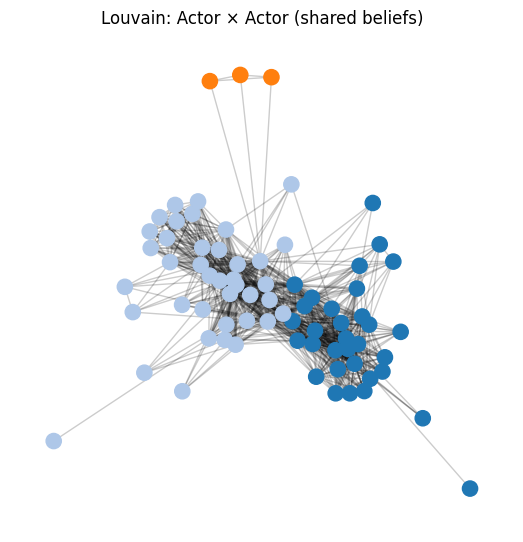

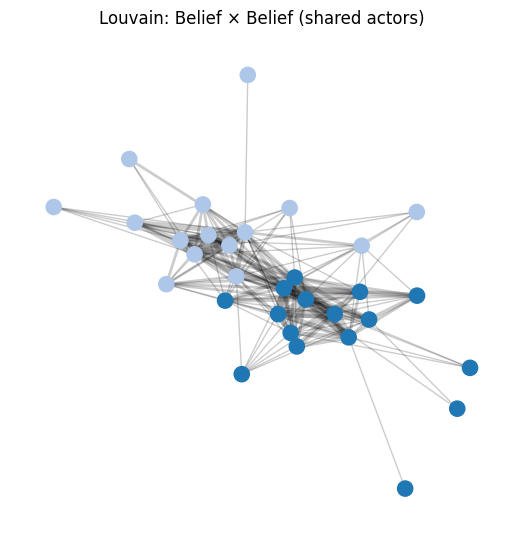

In [ ]:
# !pip install python-louvain

import community as community_louvain  # Louvain method for community detection
import matplotlib.cm as cm

SEED = 42

# Helpful function to draw a weighted graph (no labels, Louvain-colored)
def draw_weighted_louvain(G, title, seed=SEED):
    if G.number_of_nodes() == 0:
        print(f"{title}: graph is empty.")
        return

    # Run Louvain community detection
    partition = community_louvain.best_partition(G, weight="weight", random_state=seed)

    # Layout
    pos = nx.spring_layout(G, seed=seed, k=None)

    # Color map communities
    cmap = cm.get_cmap("tab20")  # categorical color palette
    node_colors = [cmap(partition[n] % cmap.N) for n in G.nodes()]

    # Edge widths
    weights = [d.get("weight",1) for _,_,d in G.edges(data=True)]

    # Plot
    plt.figure(figsize=(6.5, 6.5))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=120)
    nx.draw_networkx_edges(G, pos, width=weights, alpha=0.2)
    # 🔴 no labels
    plt.title(title)
    plt.axis("off")
    plt.show()

    return partition  # in case you want to inspect communities

# Draw both projections with Louvain coloring
part_left = draw_weighted_louvain(G_left,  "Louvain: Actor × Actor (shared beliefs)")
part_right = draw_weighted_louvain(G_right, "Louvain: Belief × Belief (shared actors)")


In [ ]:
def to_edgelist_df(G):
    rows = [(u, v, d.get("weight", 1)) for u, v, d in G.edges(data=True)]
    return pd.DataFrame(rows, columns=["u", "v", "weight"])

# Save deduped bipartite edges (source,target,weight)
bip_df.sort_values(["weight","source","target"], ascending=[False, True, True]).to_csv(BIP_OUT, index=False)

# Save left and right projections
to_edgelist_df(G_left).sort_values(["weight","u","v"], ascending=[False, True, True]).to_csv(LEFT_PROJ_OUT, index=False)
to_edgelist_df(G_right).sort_values(["weight","u","v"], ascending=[False, True, True]).to_csv(RIGHT_PROJ_OUT, index=False)

print("Saved:")
print(Path(BIP_OUT).resolve())
print(Path(LEFT_PROJ_OUT).resolve())
print(Path(RIGHT_PROJ_OUT).resolve())


Saved:
/content/bipartite_edges_weighted.csv
/content/projection_left_left_edges.csv
/content/projection_right_right_edges.csv


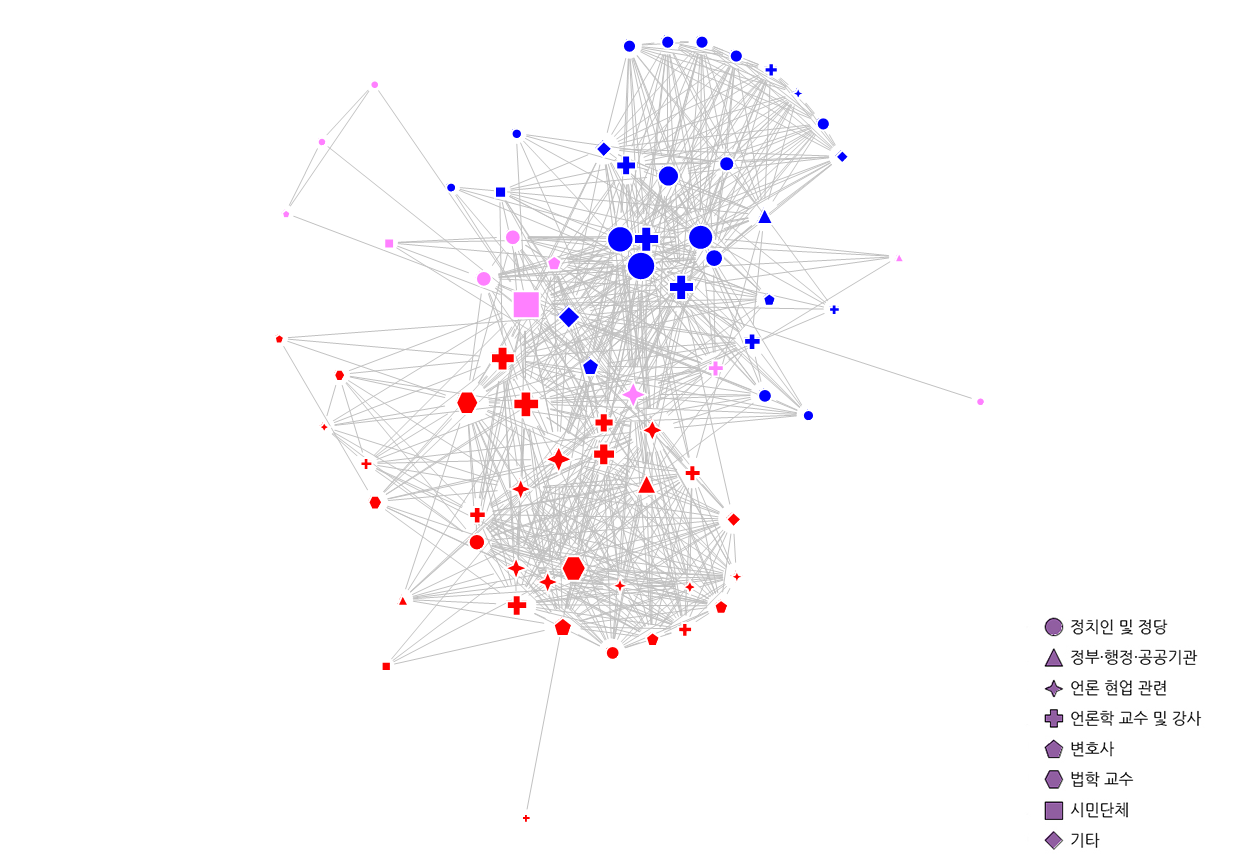

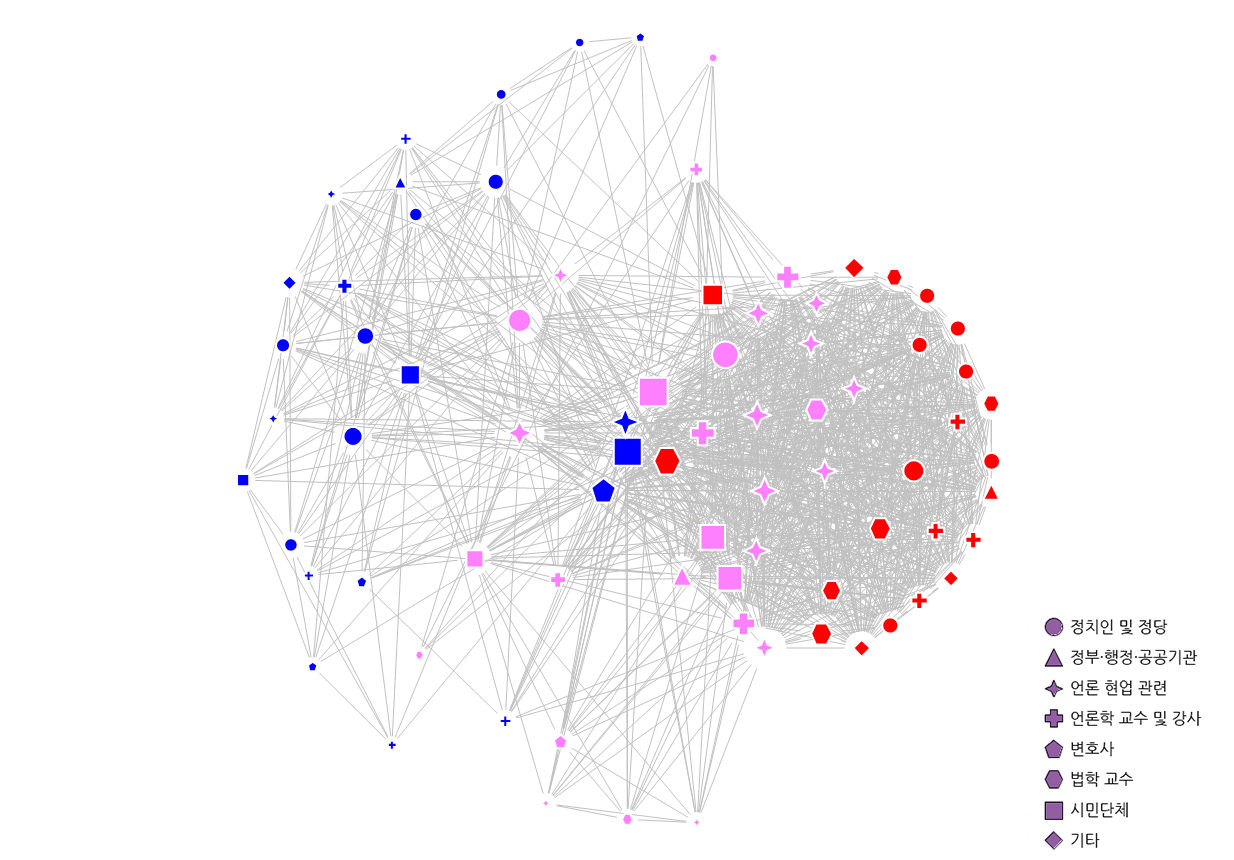

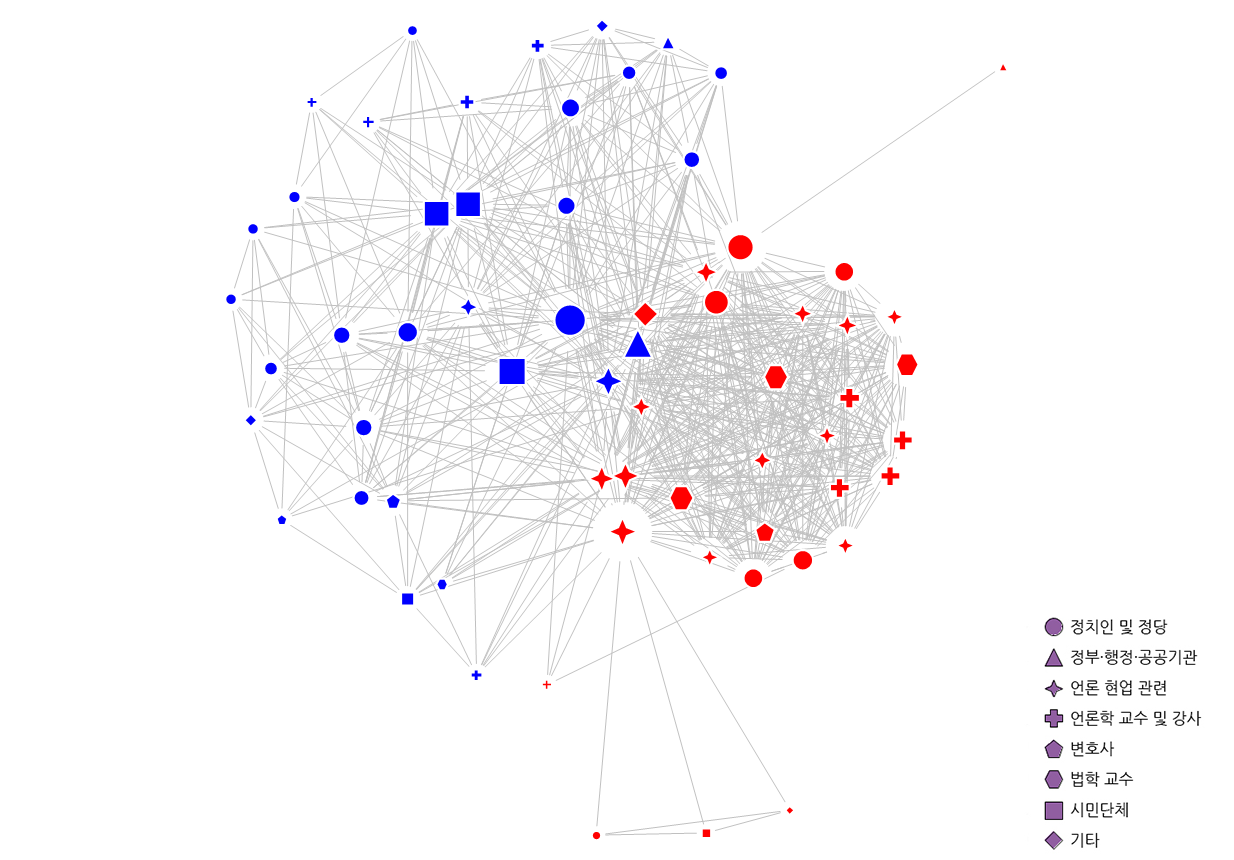